In [43]:
import pickle
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [38]:
bst = pickle.load(open('./data/experiment-maxheight-1-1.pkl', "rb"))

[16:11:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1572314959925/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [39]:
dat = pd.read_json("http://lotus-api:5000/")
dat.columns

Index(['per_0', 'per_1', 'per_2', 'per_3', 'per_4', 'per_5', 'per_6', 'per_7',
       'per_8', 'per_9', 'per_10', 'per_11', 'per_12', 'per_13', 'per_14',
       'per_15', 'per_16', 'per_17', 'per_18', 'per_19', 'per_20', 'per_21',
       'per_22', 'per_23', 'per_24', 'per_25', 'per_26', 'per_27', 'per_28',
       'per_29', 'per_30', 'per_31', 'per_32', 'per_33', 'per_34', 'per_35',
       'sig_0', 'sig_1', 'sig_2', 'sig_3', 'sig_4', 'sig_5', 'sig_6', 'sig_7',
       'sig_8', 'sig_9', 'sig_10', 'sig_11', 'sig_12', 'sig_13', 'sig_14',
       'sig_15', 'sig_16', 'sig_17', 'sig_18', 'sig_19', 'sig_20', 'sig_21',
       'sig_22', 'sig_23', 'sig_24', 'sig_25', 'sig_26', 'sig_27', 'sig_28',
       'sig_29', 'sig_30', 'sig_31', 'sig_32', 'sig_33', 'sig_34', 'sig_35',
       'GFS_wind_dir_norm', 'GFS_wind_speed', 'GFS_onshore_comp'],
      dtype='object')

In [40]:
pred = xgb.DMatrix(dat.values)
dat.values.shape

(121, 75)

In [41]:
heightft = bst.predict(pred) * 3.28
heightft

array([2.5150735, 2.5056531, 2.5056531, 2.5150735, 2.4419477, 2.422227 ,
       2.3593154, 2.218449 , 2.218449 , 2.218449 , 2.2281103, 2.4724767,
       2.4824111, 2.4824111, 2.4738069, 2.4738069, 2.4738069, 2.4994957,
       2.4994957, 2.4738069, 2.4516234, 2.4494693, 2.4430552, 4.3742003,
       4.542768 , 4.4250617, 4.220412 , 4.220412 , 4.2068634, 4.2068634,
       4.343442 , 4.178498 , 4.628136 , 4.189881 , 4.1091776, 4.188902 ,
       4.1545486, 4.535966 , 4.285017 , 4.1815   , 2.525186 , 2.779989 ,
       2.7573335, 2.6258185, 2.6538188, 2.6726525, 2.6311321, 2.5994499,
       2.5994499, 2.1156137, 2.4621513, 2.689685 , 2.4621513, 2.452612 ,
       2.4621513, 2.4430552, 2.4430552, 2.4430552, 2.2943344, 2.4011111,
       2.2492397, 2.4393728, 2.4393728, 2.5329275, 2.527196 , 2.5015073,
       2.4101639, 2.5015073, 2.5015073, 2.4824111, 2.4547107, 2.4188607,
       2.2683327, 2.2779942, 2.2683327, 2.2683327, 2.2779942, 2.2915428,
       4.258544 , 2.725056 , 2.725056 , 2.7594097, 

(0, 8)

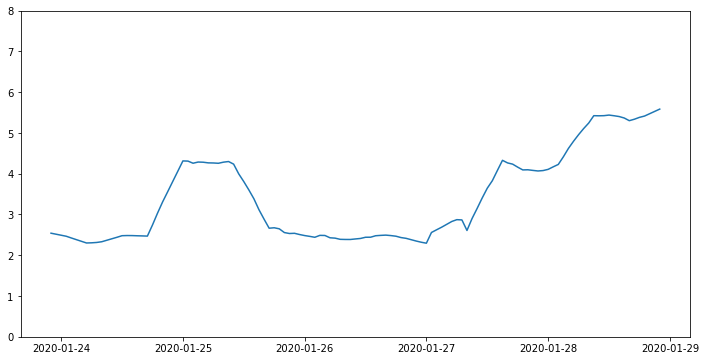

In [62]:
plt.figure(figsize=(12,6))
plt.plot(dat.index, savgol_filter(heightft, 7, 1))
plt.ylim(0, 8)